Plot and summarize MultiNest samples using getdist. Based on a script Wahid sent me.

In [1]:
# import anaconda3/personal python libraries
# TODO: maybe there's a cleaner way of doing this?
import sys
sys.path.append('/home/tmakinen/anaconda3/lib/python3.6/site-packages/')

In [2]:
import pandas as pd
import getdist
import getdist.plots as pt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
parameters = ['alpha', 'beta', 'rx', 'rc', 'sigma_res', 
              'cstar', 'xstar', 'mstar', 'omegam', 'omegade', 
              'h', 'evidence'] # order should match your multinest output

param_plot_limits = {
    'alpha': (.12, .16),
    'beta': (2.6, 3.6),
    'omegam': (0, .7),
    'omegade': (0, 1.1)
}

param_true_values = {
    'alpha': .14,
    'beta': 3.2,
    'omegam': .3,
    'omegade': .7,
    'h': .7
}

In [4]:
params_of_interest = ['alpha', 'beta', 'omegam', 'omegade', 'h']

# load multinest result

In [5]:
job_id = '2074512'

In [6]:
data = pd.read_csv('/work/tmakinen/{}.cx1/post_equal_weights.dat'.format(job_id), sep="\s+", header=None)
data.columns = parameters
data = data[params_of_interest]

In [12]:
data;

# calculate summary statistics

In [13]:
bias = data.mean() - [param_true_values[label] for label in data.columns.values]
var = data.var()
mse = var + bias**2

In [14]:
print(bias.to_frame('bias').T)
print(var.to_frame('var').T)
print(mse.to_frame('mse').T)

         alpha      beta    omegam   omegade         h
bias -0.004734 -0.003896  0.141788 -3.275964  0.003681
        alpha      beta    omegam   omegade         h
var  0.000018  0.008316  0.000808  0.405939  0.000024
        alpha      beta    omegam    omegade         h
mse  0.000041  0.008332  0.020912  11.137877  0.000038


# create posterior corner plot

In [15]:
mcsamples = getdist.MCSamples(samples=data.values, names=list(data.columns.values))

Removed no burn in


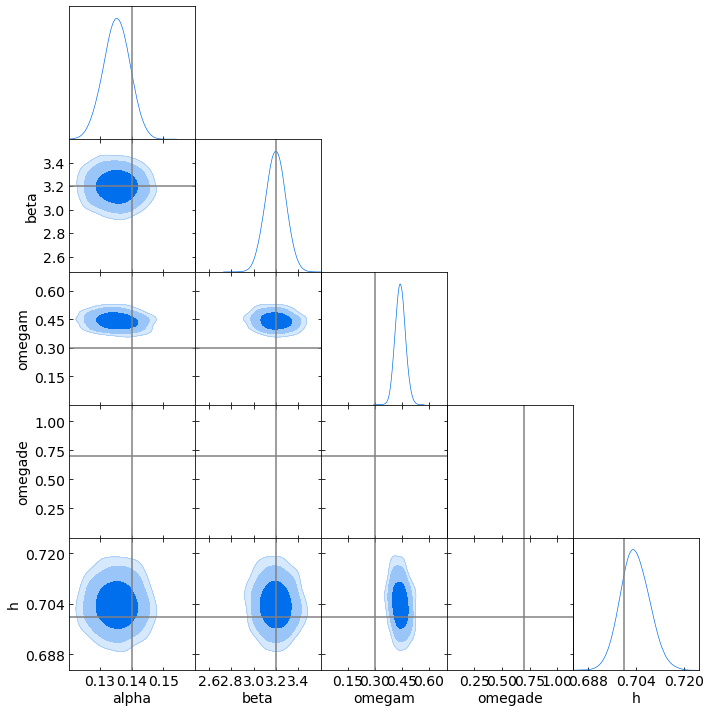

In [16]:
plotter = pt.getSubplotPlotter()
plotter.settings.num_plot_contours = 3
plotter.settings.rcSizes(14, 14)

plotter.triangle_plot(mcsamples, filled=True, param_limits=param_plot_limits)

# draw true value lines
for i in range(len(plotter.subplots)):
    for j in range(len(plotter.subplots[i])):
        subplot = plotter.subplots[i][j]
        if subplot is not None:
            if i > j: # only draw horizontal line for 2D plots
                subplot.axhline(param_true_values[params_of_interest[i]], color='gray')
            subplot.axvline(param_true_values[params_of_interest[j]], color='gray')

plt.show()